In [38]:
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
with MPRester("OrxTdTdienuaKM79RmZ") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1008680")
    pho = m.get_phonon_bandstructure_by_material_id("mp-1008680")
    

# Représentation de la structure de bande de phonons du TiGePt 

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

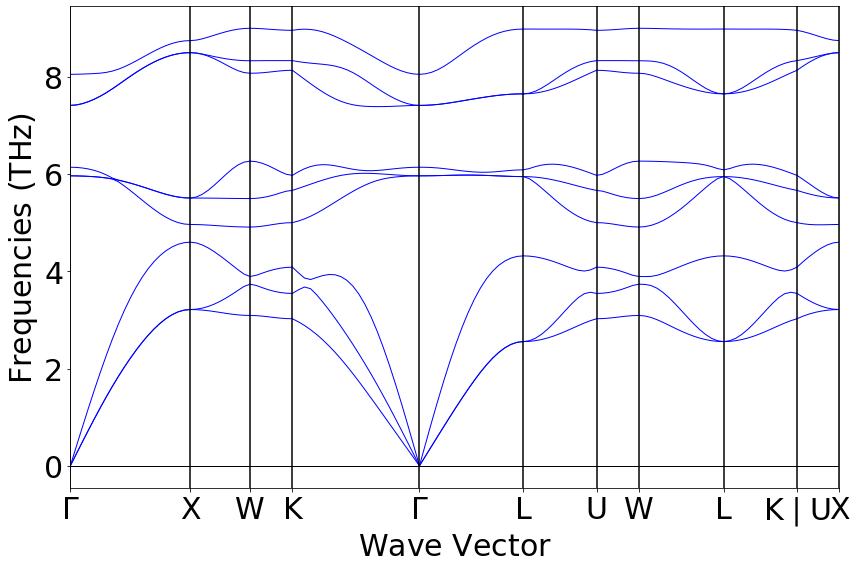

In [39]:
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.bandstructure import *
from pymatgen.phonon.plotter  import *

graph = PhononBSPlotter(pho)
graph.get_plot()

# Zone de Brillouin

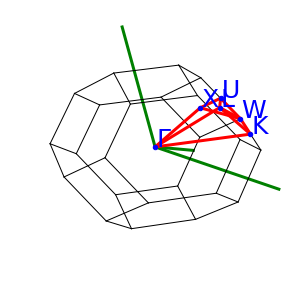

In [40]:
graph.plot_brillouin()

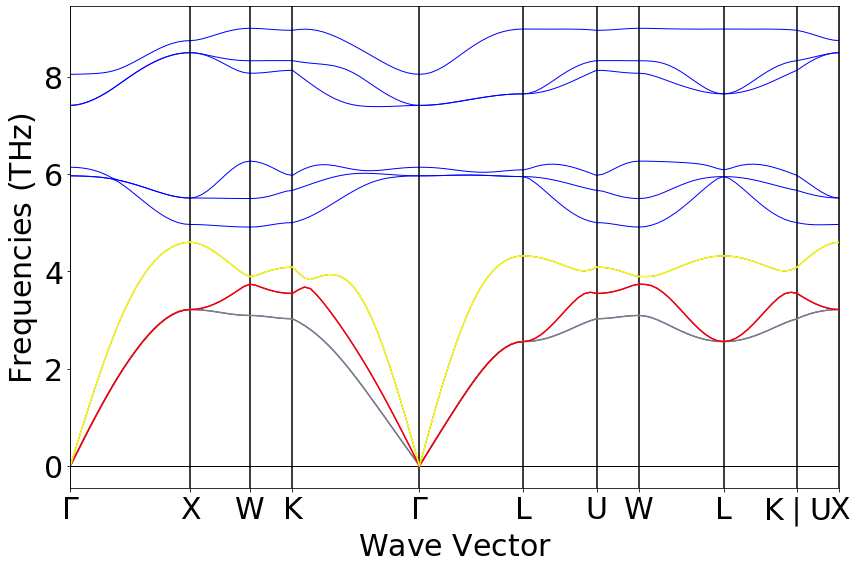

In [41]:
import matplotlib.pyplot as plt
graph.get_plot()
for i in range(len(graph.bs_plot_data().get("distances"))):
    plt.plot(graph.bs_plot_data().get("distances")[i],graph.bs_plot_data().get("frequency")[i][0],'grey')
    plt.plot(graph.bs_plot_data().get("distances")[i],graph.bs_plot_data().get("frequency")[i][1],'red')
    plt.plot(graph.bs_plot_data().get("distances")[i],graph.bs_plot_data().get("frequency")[i][2],'yellow')


# Vitesse du son

On connait la formule $ \omega = v_s q $ . On choisit trois directions parmi les cinq qui sont à notre disposition : 
$\Gamma - X , \Gamma - L, \Gamma - K , \Gamma - U , \Gamma - W $ ce qui donne après restrictions $\Gamma - X , \Gamma - L , \Gamma - K $ 


### Première bande acoustique $\Gamma - X $

In [42]:
import numpy as np

dist1 = graph.bs_plot_data().get("distances")[0]
freq1 = graph.bs_plot_data().get("frequency")[0][0]

pente_dist1 = dist1[4]-dist1[0]
pente_freq1 = freq1[4] - freq1[0]

vs1 = (pente_freq1/pente_dist1) * 2*np.pi * 10**2
print("La vitesse du son pour la première bande acoustique vaut :", vs1, " m/s")

La vitesse du son pour la première bande acoustique vaut : 2854.2342290833794  m/s


### Seconde bande acoustique $\Gamma - L $


In [43]:
dist2 = graph.bs_plot_data().get("distances")[4]
freq2 = graph.bs_plot_data().get("frequency")[4][2]

pente_dist2 = dist2[4]-dist2[0]
pente_freq2 = freq2[4] - freq2[0]

vs2 = (pente_freq2/pente_dist2) * 2*np.pi * 10**2
print("La vitesse du son pour la seconde bande acoustique vaut :", vs2, " m/s")

La vitesse du son pour la seconde bande acoustique vaut : 5091.9331377252565  m/s


### Troisième bande acoustique $\Gamma - K $


In [44]:
dist3 = graph.bs_plot_data().get("distances")[3][::-1]
freq3 = graph.bs_plot_data().get("frequency")[3][1][::-1]

pente_dist3 = dist3[4]-dist3[0]
pente_freq3 = freq3[4] - freq3[0]

vs3 = (pente_freq3/pente_dist3) * 2*np.pi * 10**2
print("La vitesse du son pour la troisième bande acoustique vaut :", abs(vs3), " m/s")

La vitesse du son pour la troisième bande acoustique vaut : 2866.549045390891  m/s


#### Représentation des vitesses sur le graphe

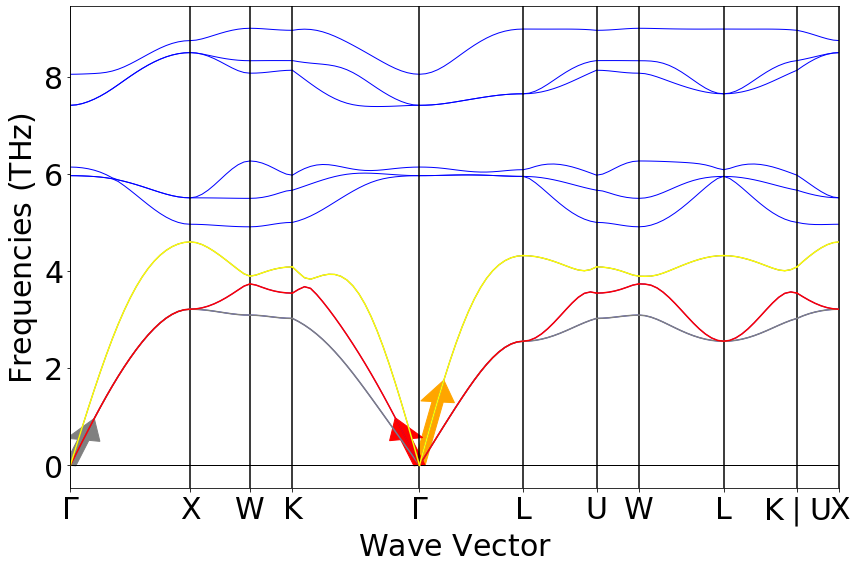

In [45]:
graph.get_plot()
for i in range(len(graph.bs_plot_data().get("distances"))):
    plt.plot(graph.bs_plot_data().get("distances")[i],graph.bs_plot_data().get("frequency")[i][0],'grey')
    plt.plot(graph.bs_plot_data().get("distances")[i],graph.bs_plot_data().get("frequency")[i][1],'red')
    plt.plot(graph.bs_plot_data().get("distances")[i],graph.bs_plot_data().get("frequency")[i][2],'yellow')

plt.arrow(dist1[0], freq1[0], pente_dist1, pente_freq1, color='grey',width = 0.1,length_includes_head =True)
plt.arrow(dist2[0], freq2[0], pente_dist2, pente_freq2, color='orange',width = 0.1,length_includes_head =True)
plt.arrow(dist3[0], freq3[0], pente_dist3, pente_freq3, color='red',width = 0.1,length_includes_head =True)